In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [90]:
# Load the data

data = pd.read_csv('./data/Tong-etal_2024.tab', sep='\t', encoding='utf-8', index_col='Sample ID')

In [91]:
# import regex as re
# remove_paranthesis = re.compile(r'(?<!Method )|(?<!Soil texture class )(\(.*\))')

In [92]:
# columns = [remove_paranthesis.sub('', column) for column in data.columns]
# columns = [column.strip() for column in columns]
# data.columns = columns

In [115]:
with open('./data/dataset_description.txt', 'w') as file:
    for column in data.columns:
        file.write(column + '\n')

In [99]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2925 entries, 1_0 to 475_1
Data columns (total 31 columns):
 #   Column                                                         Non-Null Count  Dtype  
---  ------                                                         --------------  -----  
 0   Event                                                          2925 non-null   object 
 1   ID (ID of the sampling site)                                   2925 non-null   int64  
 2   Longitude (WGS84)                                              2925 non-null   float64
 3   Latitude (WGS84)                                               2925 non-null   float64
 4   Elevation [m a.s.l.] (Of the surface of the samplin...)        2925 non-null   int64  
 5   Land use (Land-use type of the sampling...)                    2925 non-null   object 
 6   Year sampl (The year in which the soil sa...)                  2925 non-null   int64  
 7   Depth soil [m] (The depth at which the soil s...)             

In [94]:
def missing_values(data):
    missing_values_df = pd.DataFrame({'column': data.columns,
                                      'missing_values': data.isnull().sum(),
                                      'percentage': (data.isnull().sum()/len(data) * 100)})
    missing_values_df.index = range(1, len(missing_values_df) + 1)
    missing_values_df = missing_values_df.sort_values(by='missing_values', ascending=False)
    return missing_values_df

In [95]:
missing_values(data)

,column,missing_values,percentage
31,Quantile range ([θs_RE _range] Quantile range...),1890,64.615385
30,SWC e [%] ([θs_RE] Absolute relative err...),1890,64.615385
29,R**2 ([fit_r²] Coefficient of deter...),1890,64.615385
28,fit PWP [m**3/m**3] ([fit_PWP] Permanent wilti...,1890,64.615385
27,fit Field capa [m**3/m**3] ([fit_FC] Field cap...,1890,64.615385
26,fit m ([fit_m] Fitted shape paramete...),1890,64.615385
25,fit n ([fit_n] Fitted shape paramete...),1890,64.615385
24,fit α [m**-1] ([fit_α] Fitted shape paramete...),1890,64.615385
23,fit SWC res [m**3/m**3] ([fit_θr] Fitted resid...,1890,64.615385
22,fit SWC sat [m**3/m**3] ([fit_θs] Fitted satur...,1890,64.615385


In [117]:
def get_unique_values(data:pd.DataFrame) -> pd.DataFrame:
    unique_values_dict = {}
    for column in data.columns:
        unique_values_dict[column] = [data[column].nunique(), data[column].unique()]
        
    unique_values_df = pd.DataFrame(unique_values_dict).T.rename(columns={0: 'count', 1: 'unique_values'})
    unique_values_df = unique_values_df.sort_values(by='count', ascending=False)
    
    return unique_values_df

def get_obj_cols(data:pd.DataFrame) -> pd.DataFrame:
    obj_cols = data.select_dtypes(include='object').columns
    return obj_cols

def get_num_cols(data:pd.DataFrame) -> pd.DataFrame:
    num_cols = data.select_dtypes(include=np.number).columns
    return num_cols

def count_plot(df, col, nrow, ncol, i):
    plt.subplot(nrow, ncol, i)
    plot = sns.countplot(x=col, data=df)
    plot.set_xticks(plot.get_xticks())
    plot.set_xticklabels(plot.get_xticklabels(), rotation=45)

def bar_plot(df, col, nrow, ncol, i):
    plt.subplot(nrow, ncol, i)
    plot = sns.barplot(x=col, y='outcome', data=df)
    plot.set_xticklabels(plot.get_xticklabels(), rotation=45)

def num_plot(df, col, nrow, ncol, i):
    plt.subplot(nrow, ncol, i)
    plot = sns.histplot(x=col, data=df, kde=True)
    plot.set_xticklabels(plot.get_xticklabels(), rotation=45)

def make_plot(df:pd.DataFrame, cols:list, cat:bool=False, cplt:bool=True, bplt=False):
    nrow = np.int16(np.ceil(len(cols)/4))
    ncol = np.int16(np.ceil(len(cols)/nrow))
    plt.subplots(nrow, ncol, figsize=(20, 18))
    i = 1
    plt.subplots_adjust(hspace=.5)

    for col in cols:
        if cat:
            if cplt:
                count_plot(df, col, nrow, ncol, i)
            if bplt:
                bar_plot(df, col, nrow, ncol, i)
        else:
            num_plot(df, col, nrow, ncol, i)
        i=i+1
    plt.tight_layout()
    plt.show()

In [118]:
obj_cols = get_obj_cols(data)
num_cols = get_num_cols(data)

get_unique_values(data[obj_cols])['count']

Event                                                      475
Soil texture class (Based on USDA (subclasses (cl...)        8
Land use (Land-use type of the sampling...)                  4
Soil texture quality (Quality level of soil particl...)      4
Quantile range ([θs_RE _range] Quantile range...)            4
Soil texture class (Based on USDA (broad categori...)        2
Method (Method for measuring soil par...)                    1
Method (Method for measuring soil bul...)                    1
Method (Method for measuring soil sat...)                    1
Method (Method for measuring soil wat...)                    1
Name: count, dtype: object

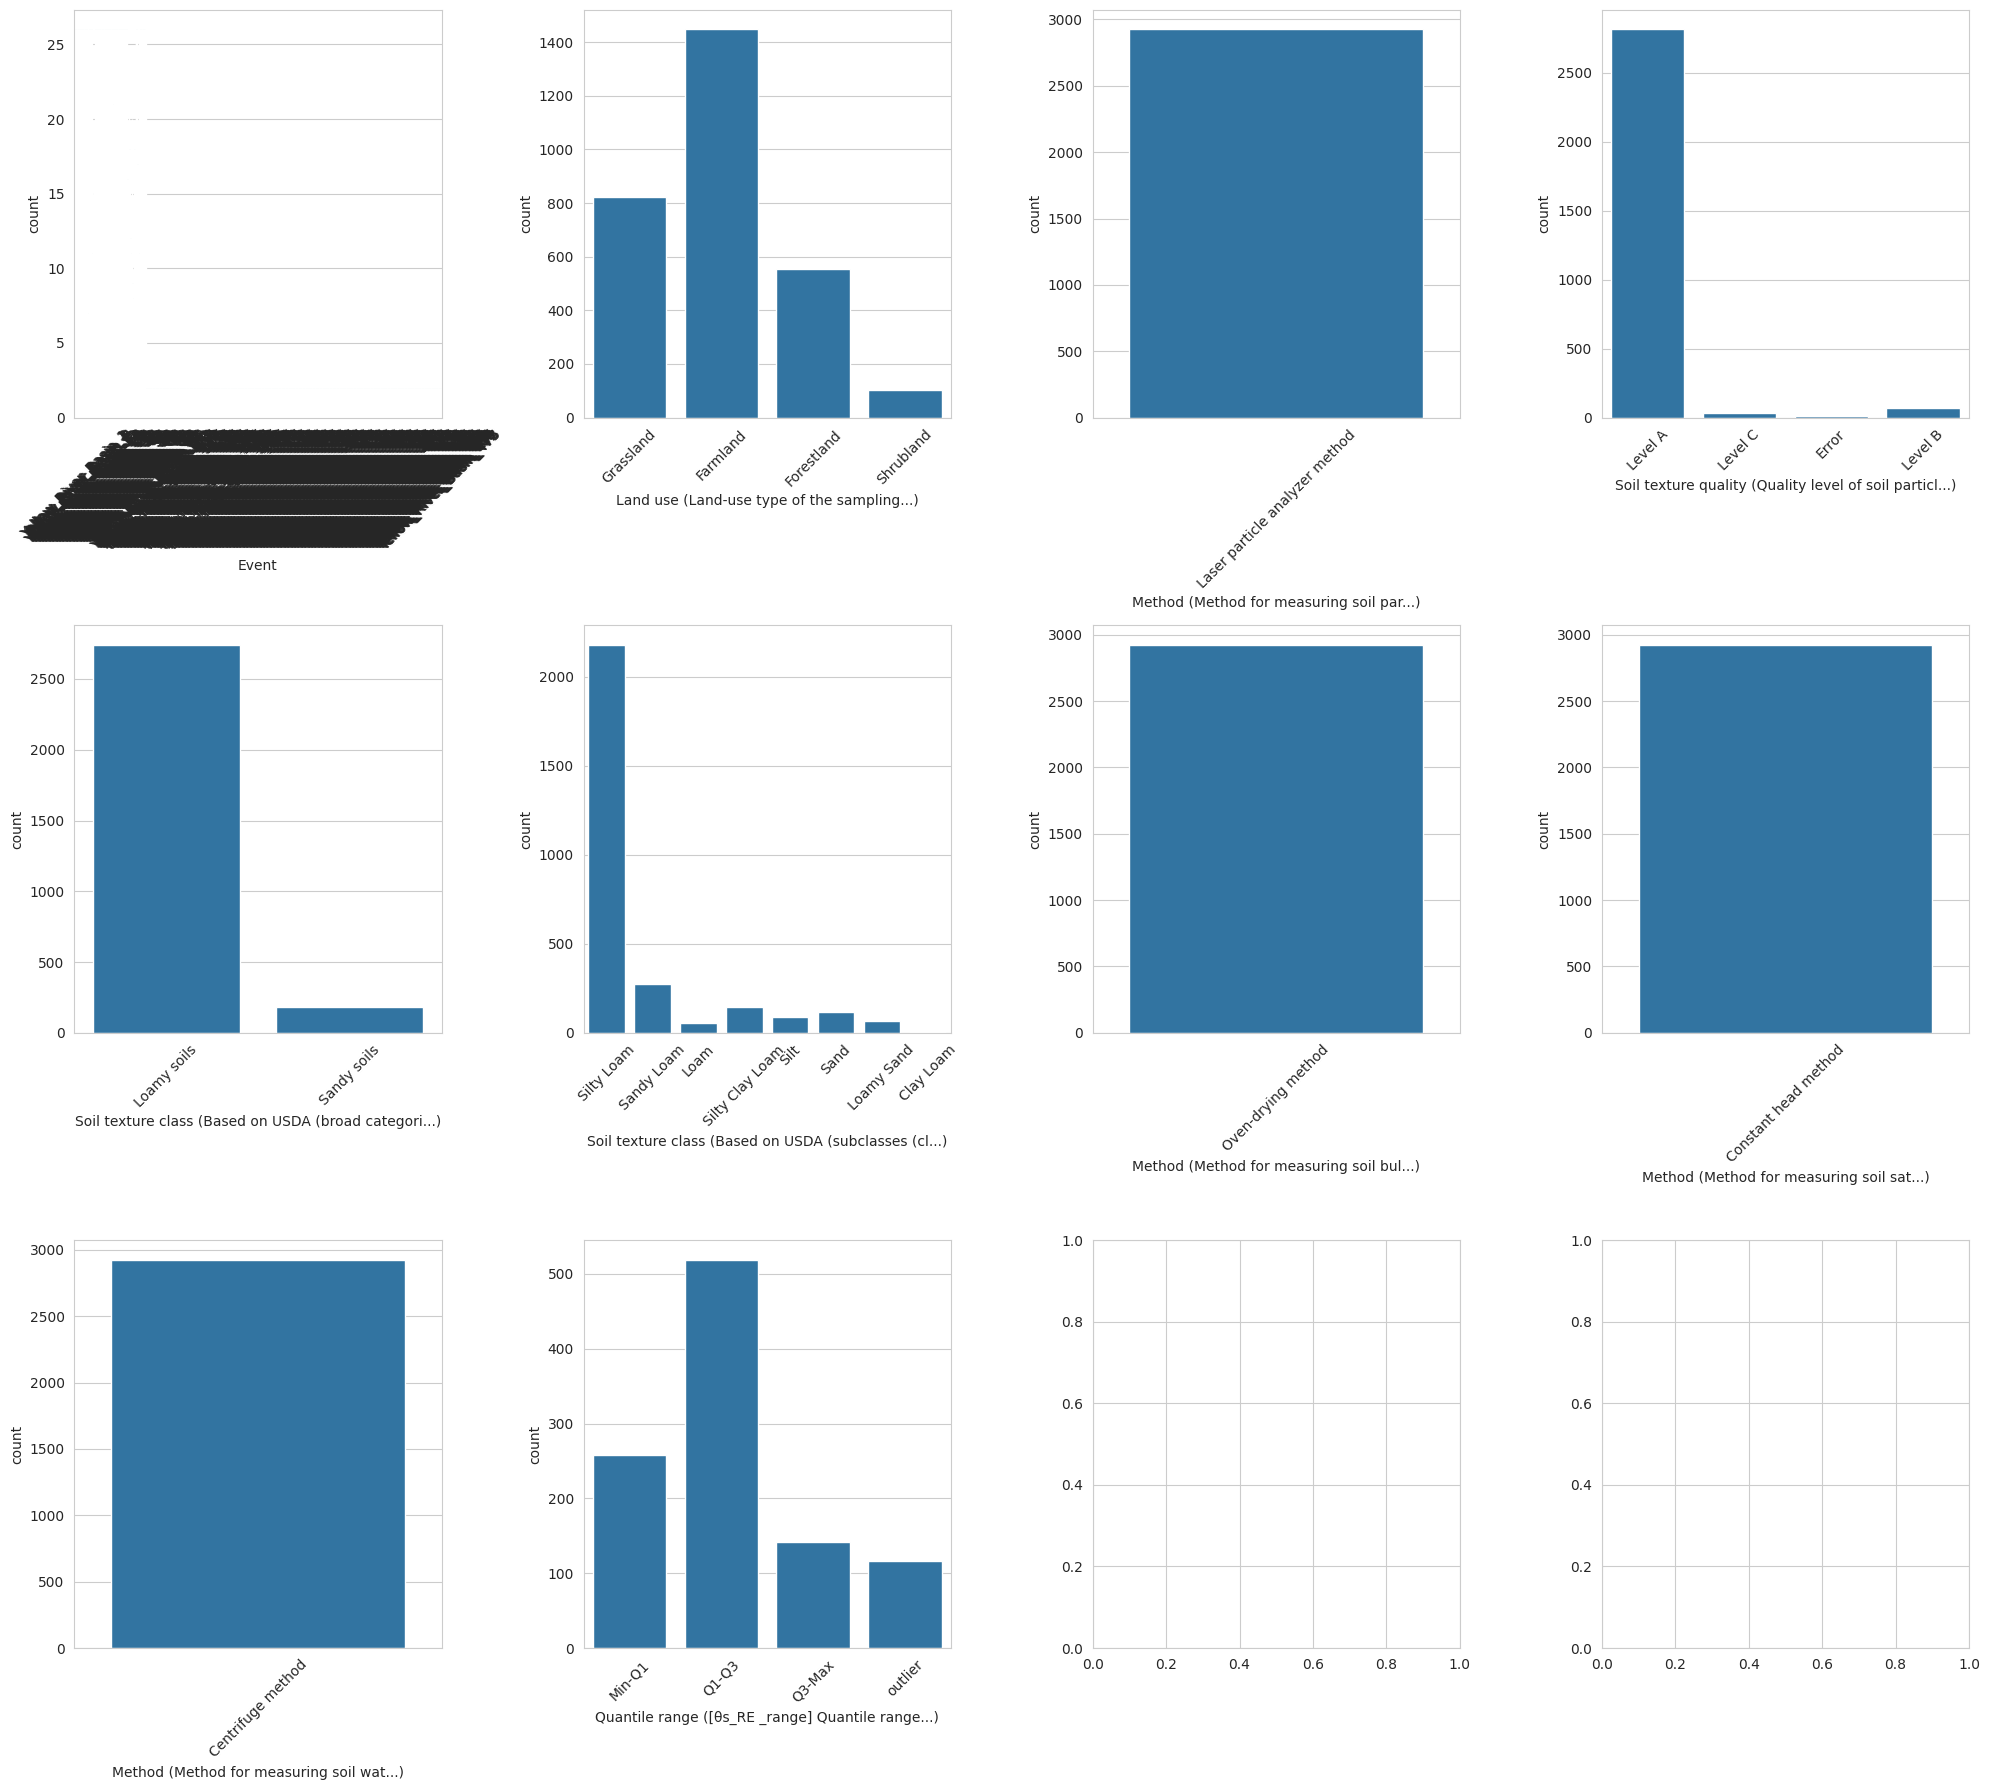

In [119]:
make_plot(data, obj_cols, cat=True, cplt=True, bplt=False)

/tmp/ipykernel_60279/3478257897.py:33: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plot.set_xticklabels(plot.get_xticklabels(), rotation=45)
/tmp/ipykernel_60279/3478257897.py:33: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plot.set_xticklabels(plot.get_xticklabels(), rotation=45)
/tmp/ipykernel_60279/3478257897.py:33: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plot.set_xticklabels(plot.get_xticklabels(), rotation=45)
/tmp/ipykernel_60279/3478257897.py:33: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plot.set_xticklabels(plot.get_xticklabels(), rotation=45)
/tmp/ipykernel_60279/3478257897.py:33: UserWarning: set_ticklabels() should only be used wit

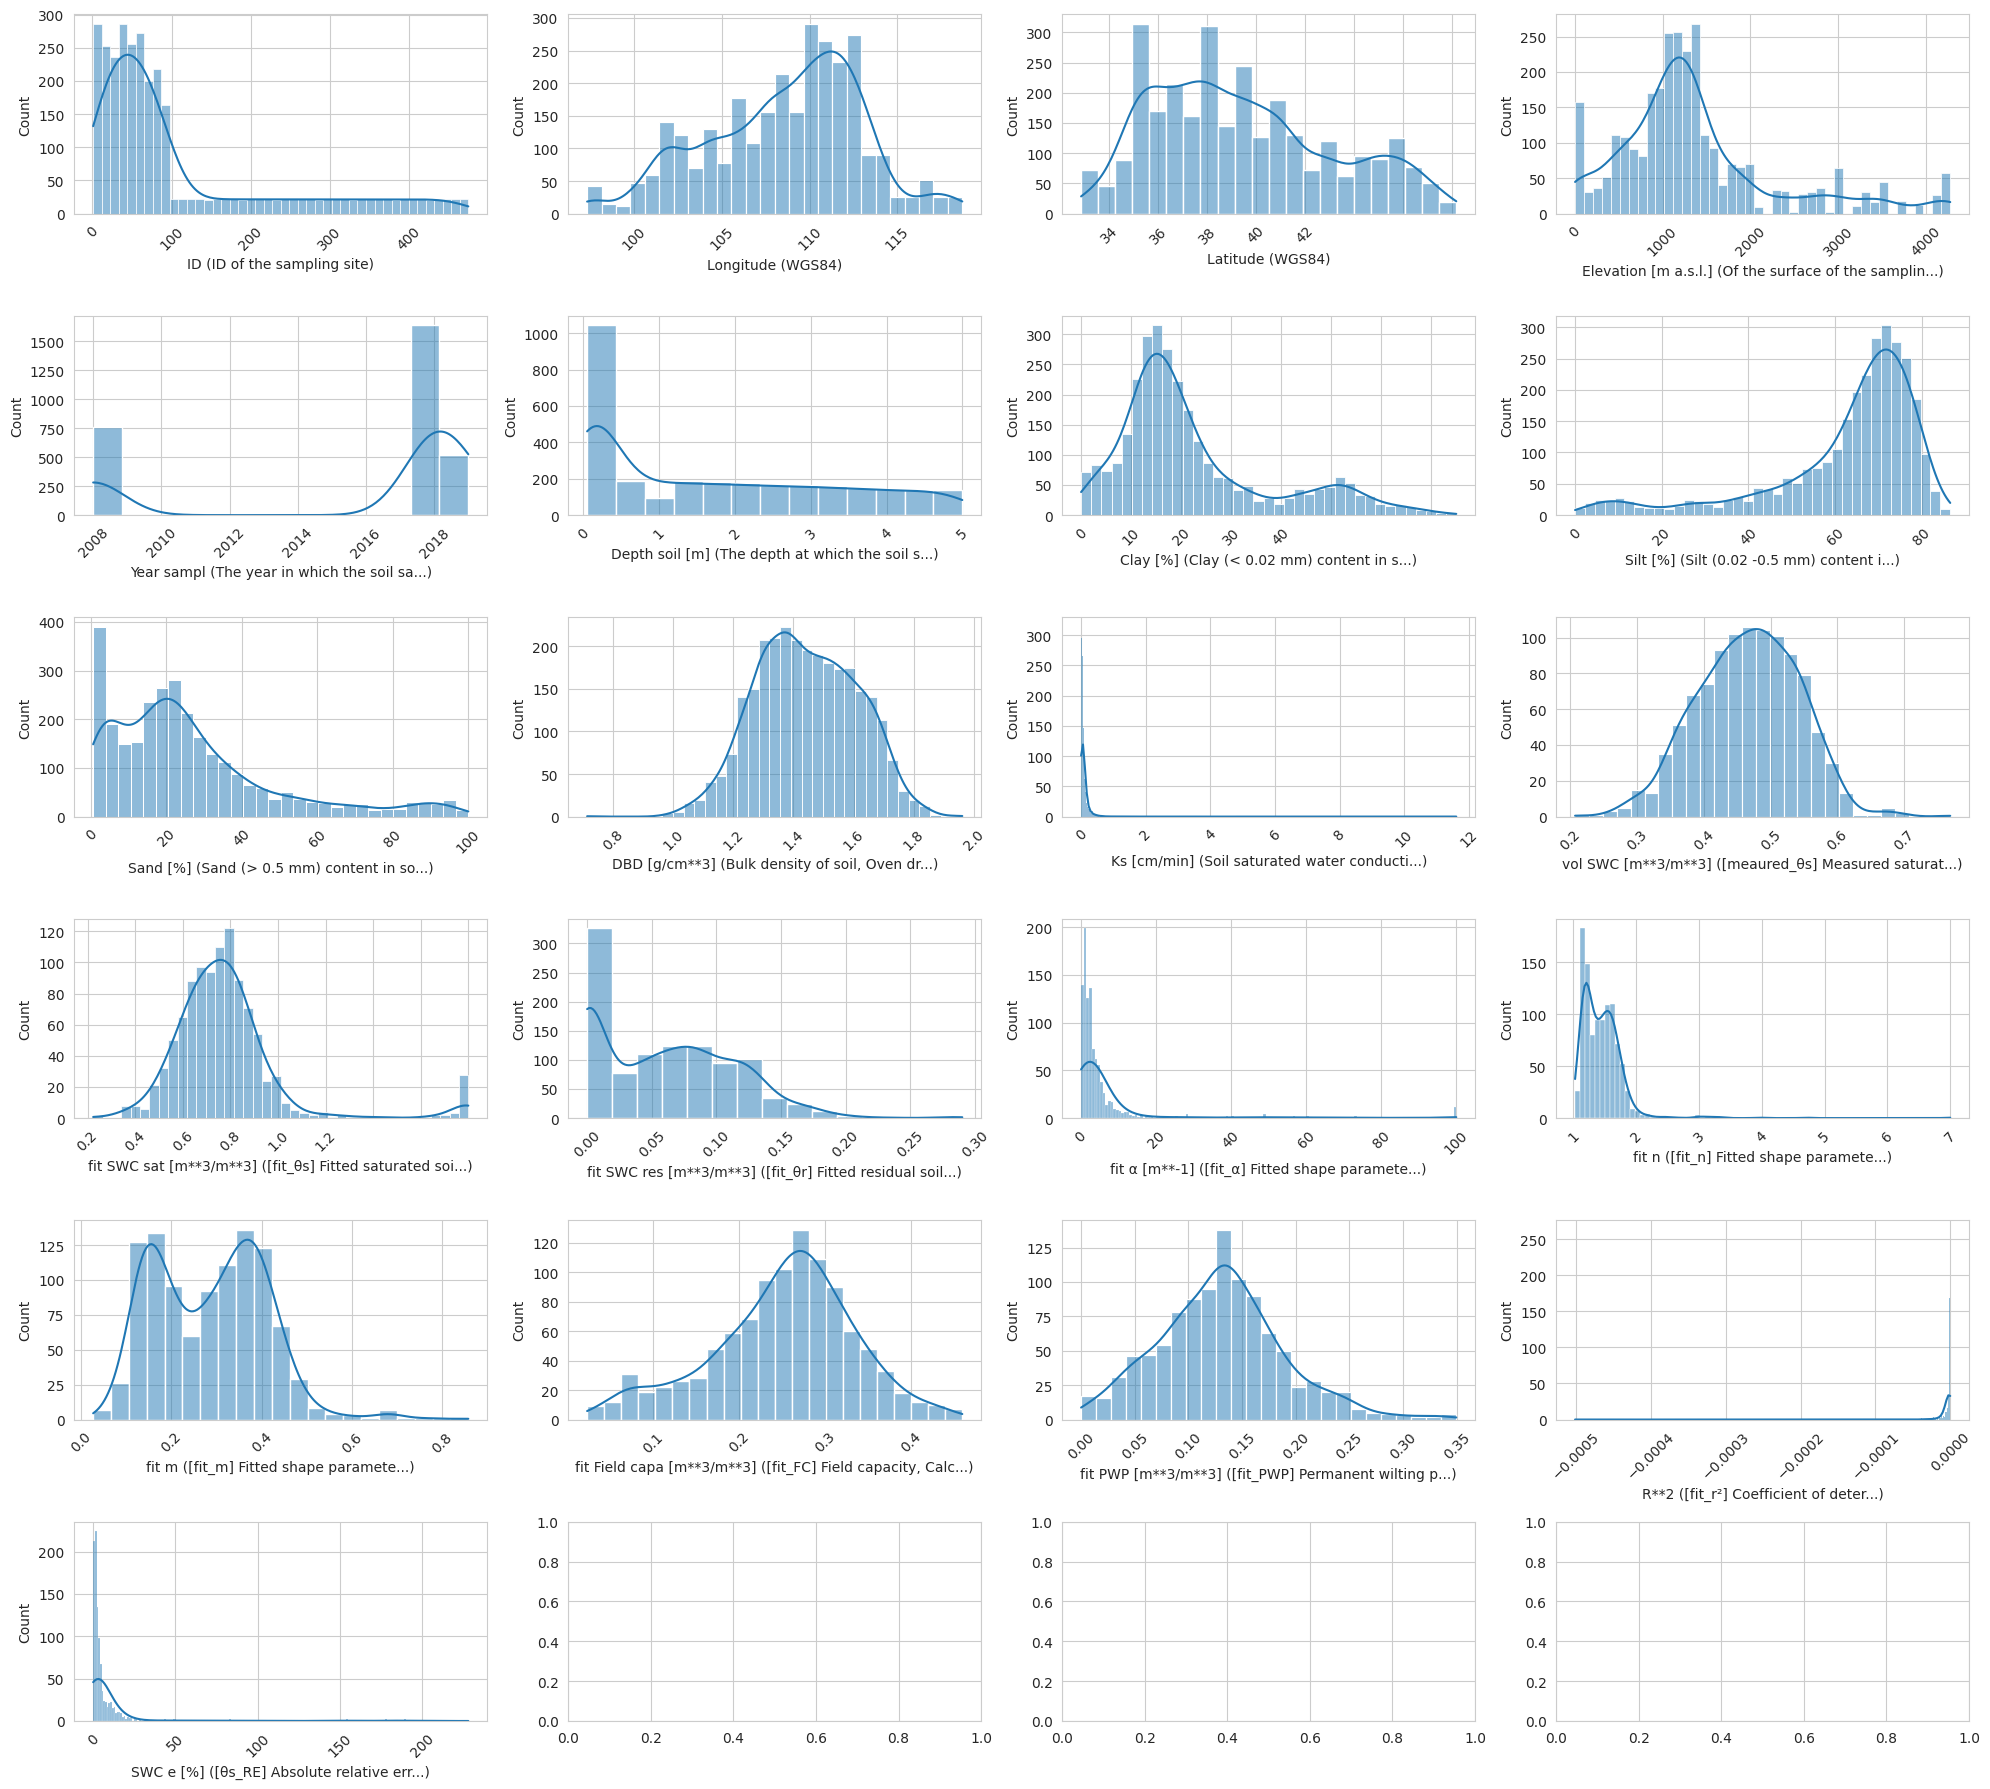

In [120]:
make_plot(data, num_cols, cat=False, cplt=False, bplt=False)